# Semester 1 Project Submission



# Elliot

In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Ian

In [2]:
# Your code here - remember to use markdown cells for comments as well!

# Frida

In [2]:
# Importing
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Data Cleaning

In [4]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [5]:
# Counting missing values
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [6]:
# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

In [7]:
# Changing NaN values for String "Not Available"
movie_info_df['rating'] = movie_info_df['rating'].fillna('N/A')
movie_info_df['genre'] = movie_info_df['genre'].fillna('N/A')
movie_info_df['director'] = movie_info_df['director'].fillna('N/A')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('N/A')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('N/A')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('N/A')
movie_info_df['studio'] = movie_info_df['studio'].fillna('N/A')
movie_info_df['writer'] = movie_info_df['writer'].fillna('N/A')

In [8]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [9]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])

# Changing NaN values for "$" in Currency column
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

In [10]:
"""
Note: The information that we are interested in extracting from this database is the synopsis of each film, 
therefore, we have decided to eliminate those lines that do not have one.
"""
# Dropping rows with no synopsis
cleansed_movie_info = movie_info_df.dropna(subset=['synopsis'])

In [11]:
# Confirming that there in no more NaN values in our cleansed Data Frame
cleansed_movie_info.isna().sum() # No more NaN values! We can start our analysis using the cleansed_movie_info DF

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [12]:
# Movies with highest earnings
box_o = movie_info_df.sort_values('box_office')
box_o.head(5)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,0.0,104 minutes,N/A
1271,"In 2003, respected filmmaker and screenwriter ...",R,Horror,Paul Schrader,N/A,"May 20, 2005","Oct 25, 2005",$,0.0,111 minutes,N/A
1270,NaN,NR,Art House and International|Drama,Xie Jin,Yanzhou Lu,N/A,N/A,$,0.0,120 minutes,N/A
1267,NaN,NR,Action and Adventure|Kids and Family|Science F...,Guy Ritchie,John August|Guy Ritchie,N/A,N/A,$,0.0,N/A,N/A
1266,"Slow-moving and dark, this Klute clone stars T...",R,Drama|Mystery and Suspense,Gordon Willis,N/A,N/A,N/A,$,0.0,96 minutes,N/A


## Creating new Data Frame to work on

In [13]:
"""
Note: In order to analyze the most popular movies per year and genre, 
we created a new Data Frame containing only the Synopsis, Rating, Genres, Theater Date and Box Office.
"""
# Sppliting the theater date, keeping only the year.
only_year = cleansed_movie_info["theater_date"].str.split(",", n = 1, expand = True)

# Creating columns for new DF

years = np.array(only_year[1])
# converting Year string into float
years = years.astype(np.float) 

synopsis = np.array(cleansed_movie_info["synopsis"])
ratings = np.array(cleansed_movie_info["rating"])
box_office = np.array(cleansed_movie_info["box_office"])

# Creating Main Movie Info DF
main_movie_info = pd.DataFrame() 

# Adding columns to new DF
main_movie_info['Synopsis'] = synopsis
main_movie_info['Ratings'] = ratings
main_movie_info['Box Office'] = box_office
main_movie_info['Years'] = years
main_movie_info['Years'] = main_movie_info['Years'].fillna(0)


C:\Users\fmartinezflores\AppData\Local\Temp\ipykernel_15536\1287479178.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  years = years.astype(np.float)


In [14]:
#  Sppliting the Genres into different columns
split_genre = cleansed_movie_info["genre"].str.split("|", n = 6, expand = True)

genre1 = np.array(split_genre[0])
genre2 = np.array(split_genre[1])
genre3 = np.array(split_genre[2])
genre4 = np.array(split_genre[3])
genre5 = np.array(split_genre[4])
genre6 = np.array(split_genre[5])
genre7 = np.array(split_genre[6])

# # Adding a column for each genre in the new DF
main_movie_info['Genre 1'] = genre1
main_movie_info['Genre 2'] = genre2
#main_movie_info['Genre 3'] = genre3
#main_movie_info['Genre 4'] = genre4
#main_movie_info['Genre 5'] = genre5
#main_movie_info['Genre 6'] = genre6
#main_movie_info['Genre 7'] = genre7

# main_movie_info overview
main_movie_info.head()

# **AÑADIR NOTA EXPLICANDO PORQUE DECIDÍ DEJAR UNICAMENTE LAS PRIMERAS 2 COLIMNAS DE GÉNERO

,Synopsis,Ratings,Box Office,Years,Genre 1,Genre 2
0,"This gritty, fast-paced, and innovative police...",R,0.0,1971.0,Action and Adventure,Classics
1,"New York City, not-too-distant-future: Eric Pa...",R,600000.0,2012.0,Drama,Science Fiction and Fantasy
2,Illeana Douglas delivers a superb performance ...,R,0.0,1996.0,Drama,Musical and Performing Arts
3,Michael Douglas runs afoul of a treacherous su...,R,0.0,1994.0,Drama,Mystery and Suspense
4,The year is 1942. As the Allies unite overseas...,PG,0.0,2000.0,Drama,Kids and Family


## Analyzing the data

### How many movies have been filmed in the last decades?  

In [15]:
# Preparing data by filtering movies per Decade per Gender
_20sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929)]
_30sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1930) & (main_movie_info['Years'] <= 1939)]
_40sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1940) & (main_movie_info['Years'] <= 1949)]
_50sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1950) & (main_movie_info['Years'] <= 1959)]
_60sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1960) & (main_movie_info['Years'] <= 1969)]
_70sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1970) & (main_movie_info['Years'] <= 1979)]
_80sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1980) & (main_movie_info['Years'] <= 1989)]
_90sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1990) & (main_movie_info['Years'] <= 1999)]
_00sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2000) & (main_movie_info['Years'] <= 2009)]
_2010sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2010) & (main_movie_info['Years'] <= 2019)]

# Counting movies per decade
decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1999, 2000, 2010]
movies_per_decade = [len(_20sfilms),len(_30sfilms),len(_40sfilms),len(_50sfilms),len(_60sfilms),len(_70sfilms),len(_80sfilms),len(_90sfilms),len(_00sfilms),len(_2010sfilms)]

print('-> Movies Per Decade: ')
for x,y in zip(decades,movies_per_decade):
    print(x,y)


-> Movies Per Decade: 
1920 5
1930 14
1940 40
1950 55
1960 72
1970 64
1980 163
1999 266
2000 314
2010 204


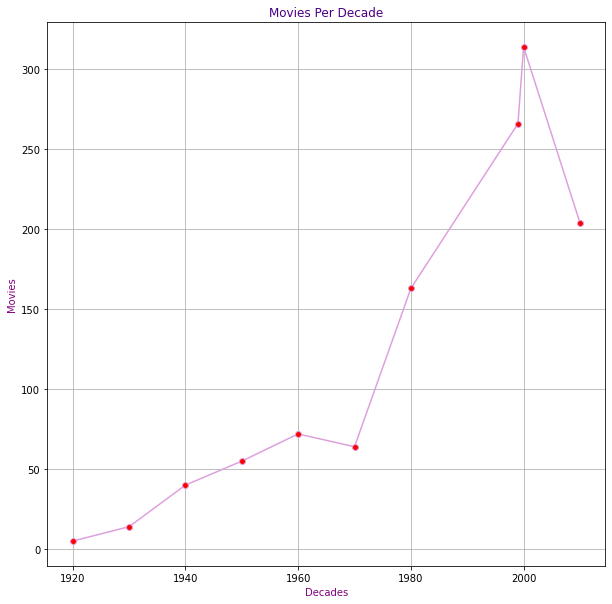

In [16]:
# Visualized data
x_decades = decades
y_count = movies_per_decade

# Graph attributes
plt.figure(figsize=(10,10))
plt.xlabel('Decades', color='purple')
plt.ylabel('Movies', color='purple')
plt.title('Movies Per Decade', color='indigo')

# Plotting
plt.plot(x_decades, y_count, marker = 'o', markerfacecolor = 'r', color = 'plum')
plt.grid(True)
plt.show()





### Which are the most popular genres in the last decades?

In [17]:
# Prepering data for visualization 
# _decades = list of pd.serie that conteins all genres of movies released per decade 
_decades_ = [_20sfilms, _30sfilms, _40sfilms, _50sfilms, _60sfilms, _70sfilms, _80sfilms, _90sfilms, _00sfilms, _2010sfilms]

# Creating a dictionary of all genres count per decade           
_20sgenres = dict(collections.Counter(_20sfilms.loc[:,'Genre 1']))
_30sgenres = dict(collections.Counter(_30sfilms.loc[:,'Genre 1']))
_40sgenres = dict(collections.Counter(_40sfilms.loc[:,'Genre 1']))
_50sgenres = dict(collections.Counter(_50sfilms.loc[:,'Genre 1']))
_60sgenres = dict(collections.Counter(_60sfilms.loc[:,'Genre 1']))
_70sgenres = dict(collections.Counter(_70sfilms.loc[:,'Genre 1']))
_80sgenres = dict(collections.Counter(_80sfilms.loc[:,'Genre 1']))
_90sgenres = dict(collections.Counter(_90sfilms.loc[:,'Genre 1']))
_00sgenres = dict(collections.Counter(_00sfilms.loc[:,'Genre 1']))
_2010sgenres = dict(collections.Counter(_2010sfilms.loc[:,'Genre 1']))

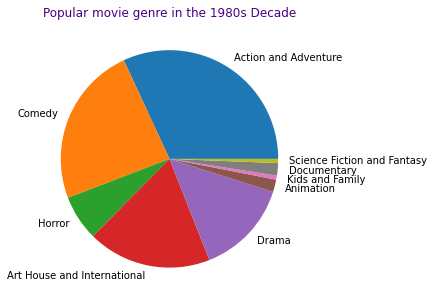

In [18]:
# Ploting data from the last decades
# 80s Decade
_80_labels = _80sgenres.keys()
_80_values = _80sgenres.values()


plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 1980s Decade', color='indigo')

# Plotting
plt.pie(_80_values, labels = _80_labels)
plt.show()

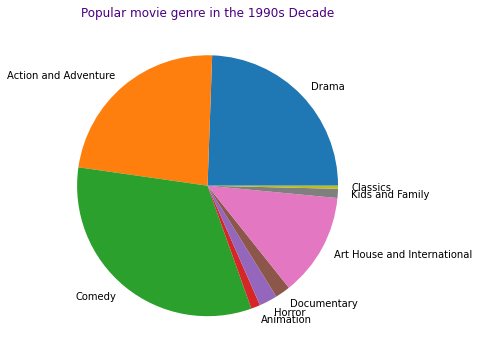

In [19]:
# Ploting data from the last decades
# 90s Decade
_90_labels = _90sgenres.keys()
_90_values = _90sgenres.values()


plt.figure(figsize=(6,6))
plt.title('Popular movie genre in the 1990s Decade', color='indigo')

# Plotting
plt.pie(_90_values, labels = _90_labels)
plt.show()

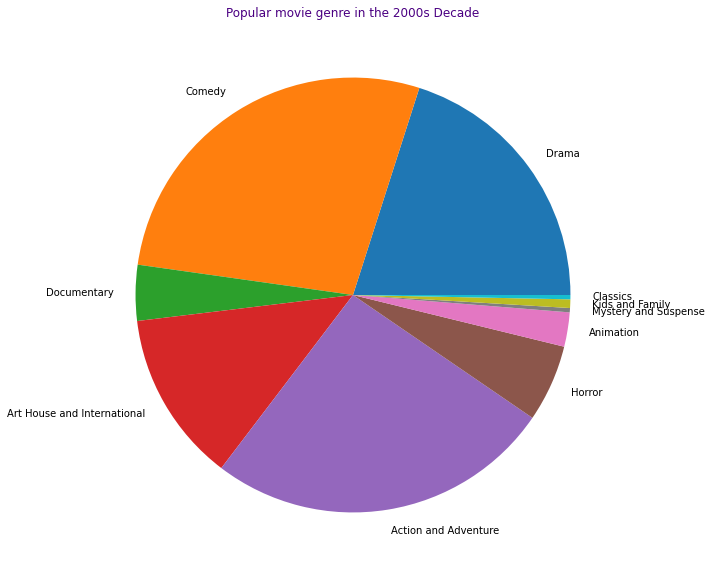

In [20]:
# Ploting data from the last decades
# 2000 Decade
_2000_labels = _00sgenres.keys()
_2000_values = _00sgenres.values()


plt.figure(figsize=(10,10))
plt.title('Popular movie genre in the 2000s Decade', color='indigo')

# Plotting
plt.pie(_2000_values, labels = _2000_labels)
plt.show()

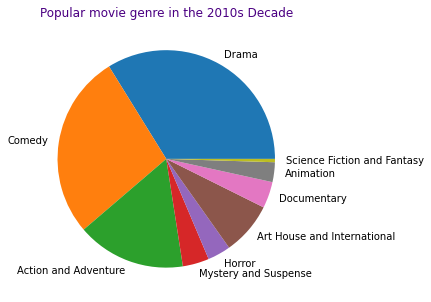

In [21]:
# Ploting data from the last decades
# 2010 Decade
_2010_labels = _2010sgenres.keys()
_2010_values = _2010sgenres.values()


plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 2010s Decade', color='indigo')

# Plotting
plt.pie(_2010_values, labels = _2010_labels)
plt.show()

In [22]:
"""
Action and Adventure, Comedy and Drama are the most popular Gernres in the las Decades.
We should film this type of movies.
"""

'\nAction and Adventure, Comedy and Drama are the most popular Gernres in the las Decades.\nWe should film this type of movies.\n'

## What are the most popular themes per genre?

In [49]:
# Importing librarys for text cleaning
import re
import math
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmartinezflores\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
from nltk.corpus import stopwords

# Cleaning synopsis
def clean_synopsis(word, stop_words):
    word = word.lower()
    words = re.findall('[a-záéíóúüñ]+', word)
    new_word = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] #remove stop words from synopsis
    return new_word

# Joining synopsis with matching Genre and Decade
def create_vocabulary(decade_genre_df):
    vocabulary = []    # Vocabulary is merge of all words in synopsis with matching Genre and Decade 
    for synopsis in decade_genre_df :
        s = clean_synopsis(synopsis.strip(),s_w)
        vocabulary.extend(s)

    return dict(collections.Counter(vocabulary))

s_w = stopwords.words('english')
#stops = set(stopwords.words('english'))
#print(stops)´+
s_w.extend(['film','one','two','story','director','new','action','adventure','peter', 'john', 'back',
            'world','man', 'well','life', 'also', 'first','get','comedy','however', 'become', 'david','allen','jack'
           'true', 'award', 'academy','deckard','willie', 'even','celie', 'loretta', 'whose','lynn','james'])

In [91]:
# Action and Adventure
#_80s_action_Adventure
_80s_action_Adventure = _80sfilms.loc[_80sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_80s_acction_adventure_voc = create_vocabulary(_80s_action_Adventure)

#_90s_action_Adventure 
_90s_action_Adventure = _90sfilms.loc[_90sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_90s_acction_adventure_voc = create_vocabulary(_90s_action_Adventure)

#_00s_action_Adventure 
_00s_action_Adventure = _00sfilms.loc[_00sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_00s_acction_adventure_voc = create_vocabulary(_00s_action_Adventure)

#_00s_action_Adventure 
_2010s_action_Adventure = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_2010s_acction_adventure_voc = create_vocabulary(_2010s_action_Adventure)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Comedy
_80s_Comedy = _80sfilms.loc[_80sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_80s_Comedy_voc = create_vocabulary(_80s_Comedy)

#_90s_Comedy 
_90s_Comedy = _90sfilms.loc[_90sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_90s_Comedy_voc = create_vocabulary(_90s_Comedy)

#_00s_Comedy 
_00s_Comedy = _00sfilms.loc[_00sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_00s_Comedy_voc = create_vocabulary(_00s_Comedy)

#_00s_Comedy 
_2010s_Comedy = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_2010s_Comedy_voc = create_vocabulary(_2010s_Comedy)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Drama
_80s_Drama = _80sfilms.loc[_80sfilms['Genre 1'] == 'Drama',"Synopsis"]
_80s_Drama_voc = create_vocabulary(_80s_Drama)

#_90s_Drama 
_90s_Drama = _90sfilms.loc[_90sfilms['Genre 1'] == 'Drama',"Synopsis"]
_90s_Drama_voc = create_vocabulary(_90s_Drama)

#_00s_Drama
_00s_Drama = _00sfilms.loc[_00sfilms['Genre 1'] == 'Drama',"Synopsis"]
_00s_Drama_voc = create_vocabulary(_00s_Drama)

#_00s_Drama
_2010s_Drama = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Drama',"Synopsis"]
_2010s_Drama_voc = create_vocabulary(_2010s_Drama)


In [92]:
def most_popular_themes(vocabulary):
    _counter = 0
    popular_themes = []
    for word in sorted(vocabulary, key=vocabulary.get, reverse=True):
        popular_themes.append(word)
        _counter += 1
        if _counter == 5:
            break
    
    return popular_themes


# Popular themes in Action Adventure movies
most_popular_80s_acction_adventure = most_popular_themes(_80s_acction_adventure_voc)
most_popular_90s_acction_adventure = most_popular_themes(_90s_acction_adventure_voc)
most_popular_00s_acction_adventure = most_popular_themes(_00s_acction_adventure_voc)
most_popular_2010s_acction_adventure = most_popular_themes(_2010s_acction_adventure_voc)

# Popular themes in Comedy movies
most_popular_80s_Comedy = most_popular_themes(_80s_Comedy_voc)
most_popular_90s_Comedy = most_popular_themes(_90s_Comedy_voc)
most_popular_00s_Comedy= most_popular_themes(_00s_Comedy_voc)
most_popular_2010s_Comedy = most_popular_themes(_2010s_Comedy_voc)

# Popular themes in Drama movies
most_popular_80s_Drama = most_popular_themes(_80s_Drama_voc)
most_popular_90s_Drama = most_popular_themes(_90s_Drama_voc)
most_popular_00s_Drama = most_popular_themes(_00s_Drama_voc)
most_popular_2010s_Drama = most_popular_themes(_2010s_Drama_voc)

# Printing results
print(most_popular_80s_Drama)
print(most_popular_90s_Drama)
print(most_popular_00s_Drama)
print(most_popular_2010s_Drama)

['years', 'young', 'husband', 'woman', 'mother']
['family', 'drama', 'time', 'young', 'begins']
['team', 'young', 'coach', 'star', 'family']
['love', 'family', 'true', 'based', 'years']


In [ ]:
"""
**CHANGE "NONE" -> N/A IN THE GENRE COLUMNS
"""

## Cleaning Synopsis

# Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# John

In [ ]:
# Your code here - remember to use markdown cells for comments as well!